<a href="https://colab.research.google.com/github/rktn0905/Tensorflow102-CNN/blob/master/LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LeNet 5**
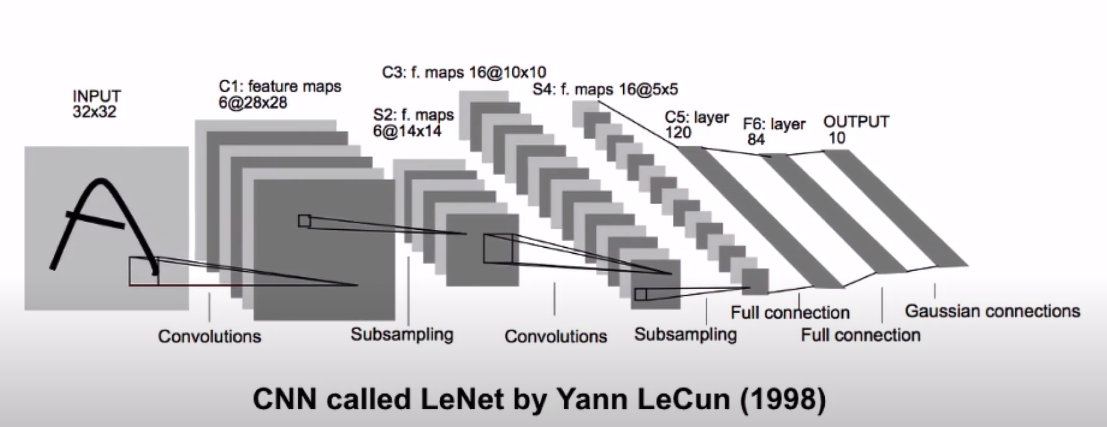

In [1]:
import tensorflow as tf
import pandas as pd

In [5]:
#데이터를 준비하고
(x, y), _ = tf.keras.datasets.mnist.load_data()
x = x.reshape(60000,28,28,1)
y = pd.get_dummies(y)
print(x.shape, y.shape)

(60000, 28, 28, 1) (60000, 10)


In [7]:
# LeNet 5 모델
X = tf.keras.layers.Input(shape=[28,28,1])

#pixel을 줄이지 않기위해 padding 추가
H = tf.keras.layers.Conv2D(6,kernel_size = 5, padding='same', activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16,kernel_size = 5, padding='same', activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               94200 

In [8]:
#모델을 학습하고
model.fit(x,y,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 3ms/step - loss: 1.1949 - accuracy: 0.8699
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0812 - accuracy: 0.9780
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0606 - accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0585 - accuracy: 0.9854
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0551 - accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0586 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0572 - accuracy: 0.9876
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0524 - accuracy: 0.9884
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0520 - accuracy: 0.9892
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.06

In [17]:
#모델을 이용
pred = model.predict(x[0:5])
pd.DataFrame(pred).round(2)

   0  1  2  3  4  5  6  7  8  9
0  0  0  0  0  0  0  1  0  0  0
1  0  0  0  0  0  0  0  0  0  1
2  0  0  0  0  0  0  0  0  0  1
3  0  0  0  0  1  0  0  0  0  0
4  0  1  0  0  0  0  0  0  0  0


In [19]:
y[0:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
